<a href="https://colab.research.google.com/github/KachanVlg/ML-studying/blob/main/ML_LR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import sklearn.utils as sku
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

          x         y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


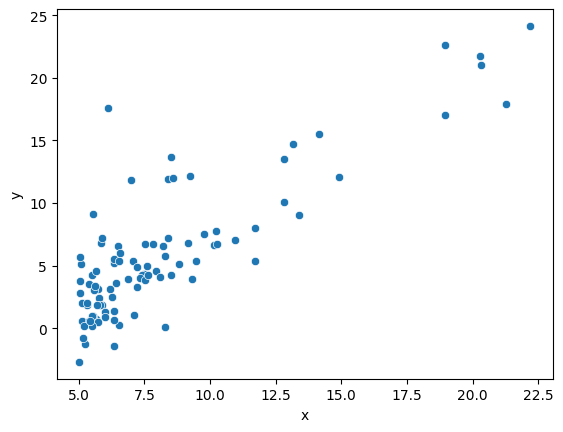

In [14]:
col_names = ['x', 'y']
path_dataset = "/content/drive/MyDrive/ML-studying/ex1data1.txt"

data_frame = pd.read_csv(path_dataset, names=col_names)

print(data_frame)
sb.scatterplot(data_frame, x='x', y='y')
plt.show()


In [24]:
def Jf(theta_0, theta_1):
  xs = data_frame['x'].values
  ys = data_frame['y'].values
  hs = theta_0 + theta_1*xs
  return np.mean(((hs-ys)**2)/2)

/tmp/ipython-input-1016676740.py:5: RuntimeWarning: overflow encountered in square
  return np.mean(((hs-ys)**2)/2)
/tmp/ipython-input-3929024482.py:20: RuntimeWarning: overflow encountered in scalar multiply
  dJ_dtheta_1 = dJ_dtheta_0*xi
/tmp/ipython-input-3929024482.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  theta_1 = theta_1 - alpha*dJ_dtheta_1
/tmp/ipython-input-3929024482.py:19: RuntimeWarning: overflow encountered in scalar multiply
  dJ_dtheta_0 = theta_0 + theta_1*xi - yi
/tmp/ipython-input-3929024482.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  theta_0 = theta_0 - alpha*dJ_dtheta_0
/tmp/ipython-input-3929024482.py:21: RuntimeWarning: overflow encountered in scalar multiply
  theta_0 = theta_0 - alpha*dJ_dtheta_0


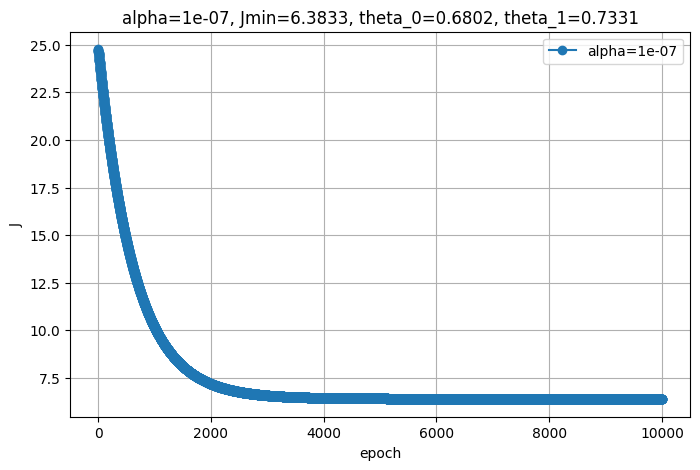

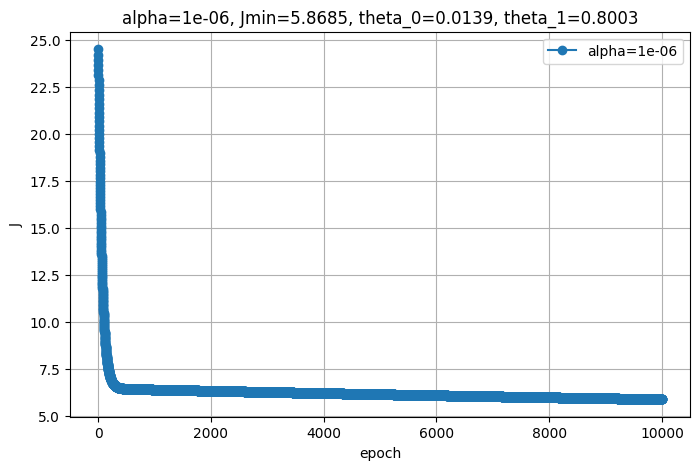

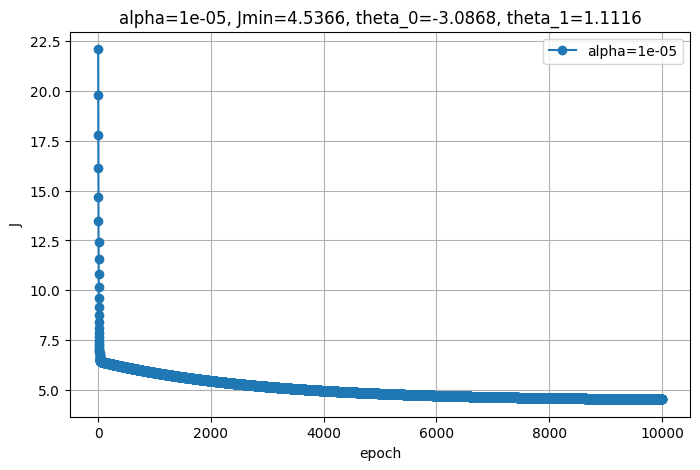

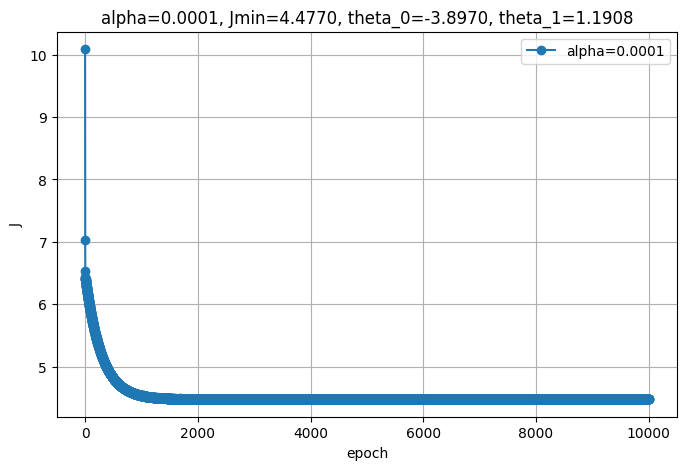

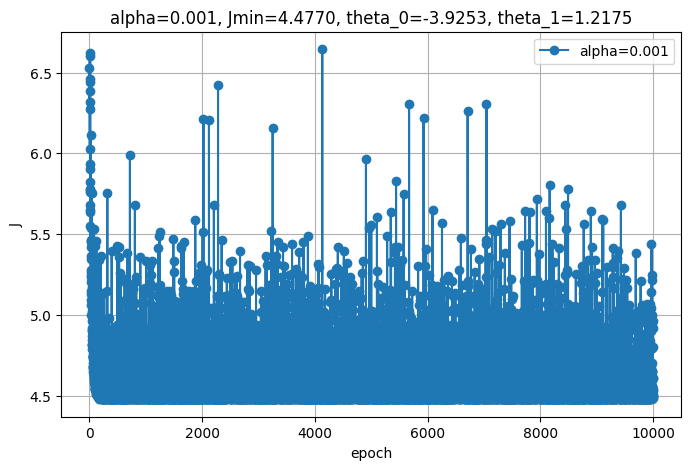

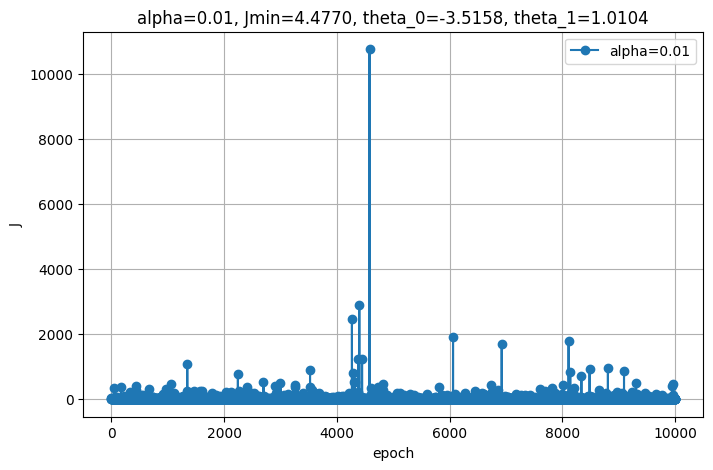

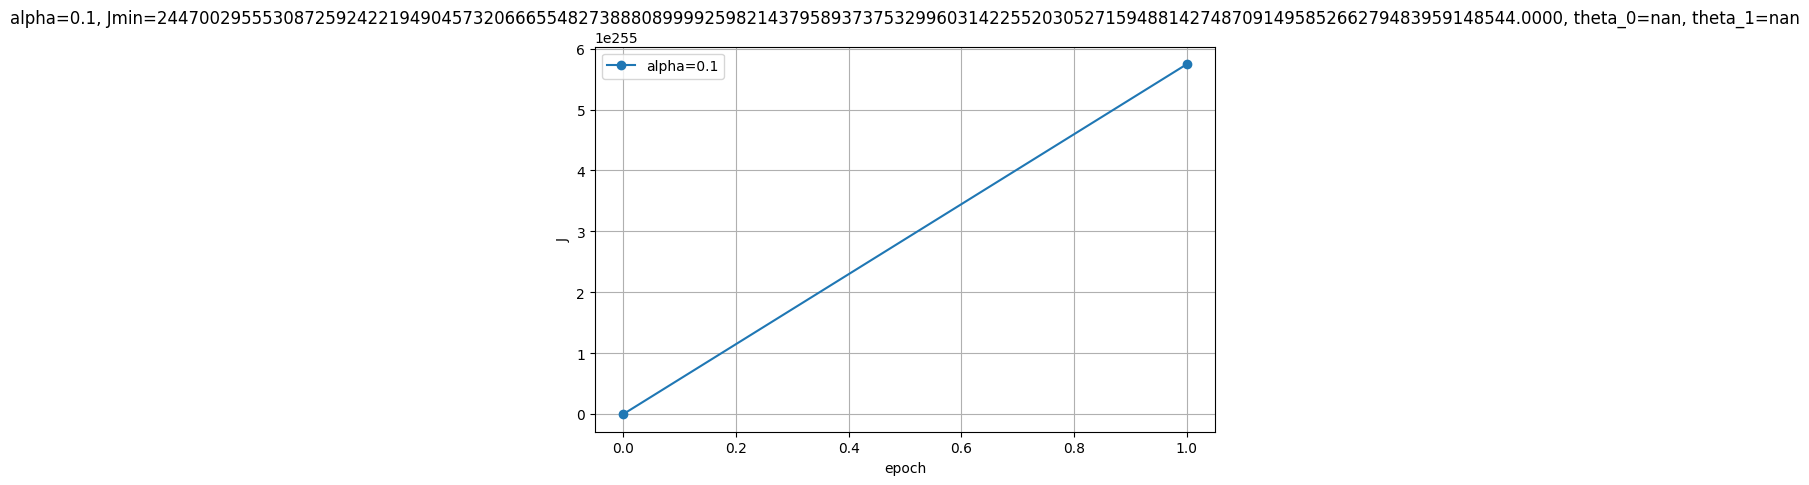

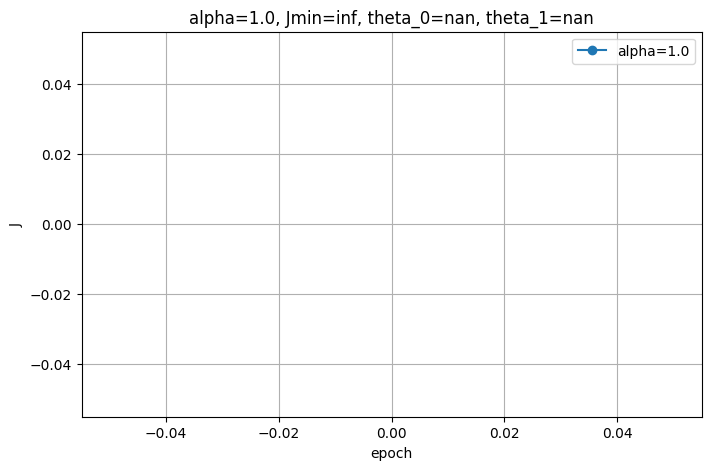

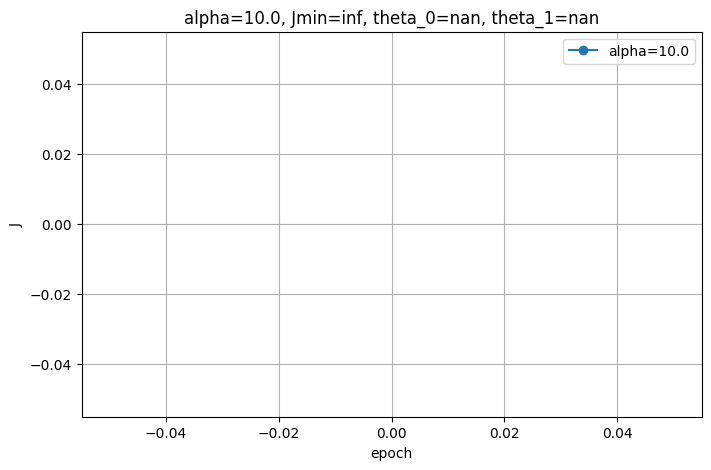

In [25]:
alphas = np.logspace(-7, 1, num=9, base=10)
theta_0_start = random.random()
theta_1_start = random.random()
epoch_num = 10000
history = {}
thetas_alpha = {}

for alpha in alphas:
  Js=[]
  theta_0_list = []
  theta_1_list = []
  theta_0 = theta_0_start
  theta_1 = theta_1_start

  for _ in range(epoch_num):
    data_frame = sku.shuffle(data_frame)

    for xi, yi in zip(data_frame['x'], data_frame['y']):
      dJ_dtheta_0 = theta_0 + theta_1*xi - yi
      dJ_dtheta_1 = dJ_dtheta_0*xi
      theta_0 = theta_0 - alpha*dJ_dtheta_0
      theta_1 = theta_1 - alpha*dJ_dtheta_1

    Js.append(Jf(theta_0 = theta_0, theta_1 = theta_1))
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)

  history[alpha] = {
      "Js": Js,
      "Jmin": min(Js),
      "theta_0": theta_0,
      "theta_1": theta_1,
      "theta_0_list": theta_0_list,
      "theta_1_list": theta_1_list
  }


for alpha, data in history.items():
    Js = data["Js"]
    epochs = range(len(Js))
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, Js, marker="o", label=f"alpha={alpha}")
    plt.xlabel("epoch")
    plt.ylabel("J")
    plt.title(
        f"alpha={alpha}, "
        f"Jmin={data['Jmin']:.4f}, "
        f"theta_0={data['theta_0']:.4f}, "
        f"theta_1={data['theta_1']:.4f}"
    )
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
def visualize_sgd_specific_view(X, y, list_teta0, list_teta1, list_J, alpha):
    m = len(y)

    min_t1, max_t1 = 0, 1.8
    min_t0, max_t0 = -10, 10

    spacing_t0 = (max_t0 - min_t0) * 0.2
    spacing_t1 = (max_t1 - min_t1) * 0.2

    grid_teta0 = np.linspace(min_t0 - spacing_t0, max_t0 + spacing_t0, 100)
    grid_teta1 = np.linspace(min_t1 - spacing_t1, max_t1 + spacing_t1, 100)
    T0, T1 = np.meshgrid(grid_teta0, grid_teta1)

    def calculate_j(t0, t1):
        return (1 / (2 * m)) * np.sum(((t0 + t1 * X) - y) ** 2)

    calculate_j_vectorized = np.vectorize(calculate_j)

    J_grid = calculate_j_vectorized(T0, T1)

    fig, ax = plt.subplots(figsize=(12, 8))
    contour = ax.contourf(T1, T0, J_grid, levels=100, cmap='viridis', alpha=0.9)
    plt.colorbar(contour, ax=ax, label='J')

    ax.plot(list_teta1, list_teta0, 'r-', linewidth=0.5, label='', alpha=0.4)
    ax.plot(list_teta1, list_teta0, 'ro', markersize=2)
    ax.plot(list_teta1[0], list_teta0[0], 'bo', markersize=5, label='Начало')
    ax.plot(list_teta1[-1], list_teta0[-1], 'go', markersize=5, label='Конец')

    ax.set_xlabel('Тета 1')
    ax.set_ylabel('Тета 0')
    ax.set_title(f'alpha = {alpha}, J = {list_J[-1]}')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

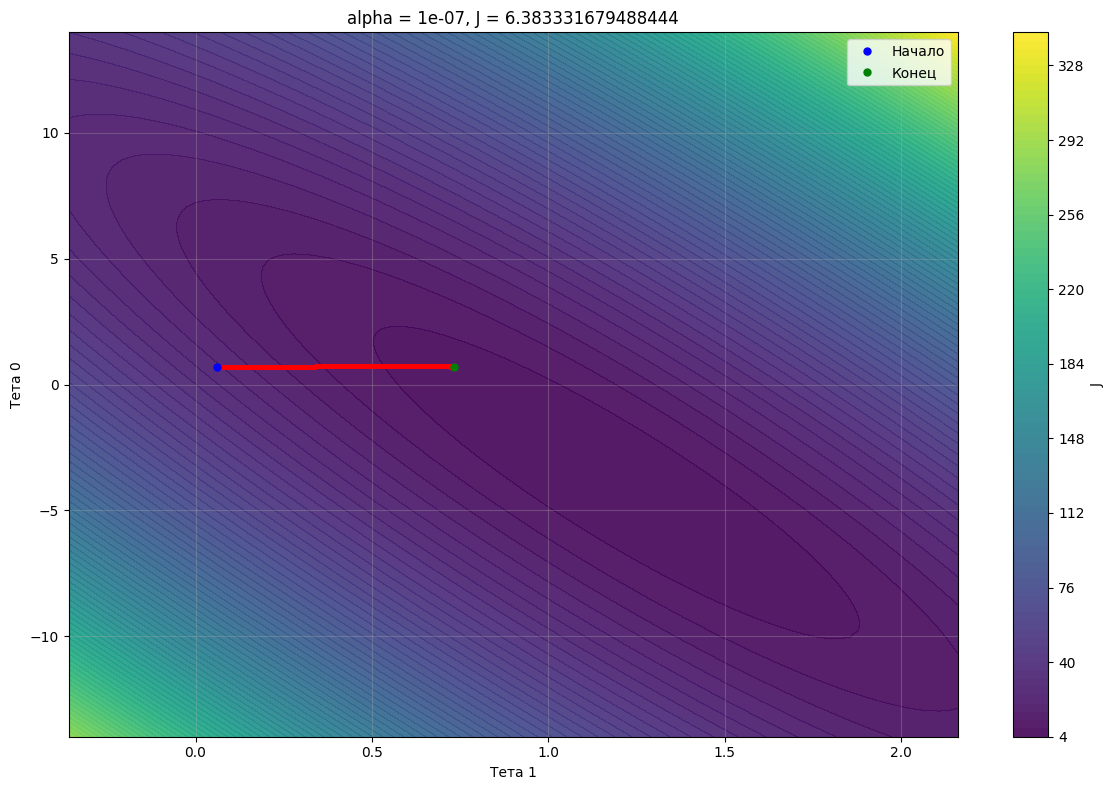

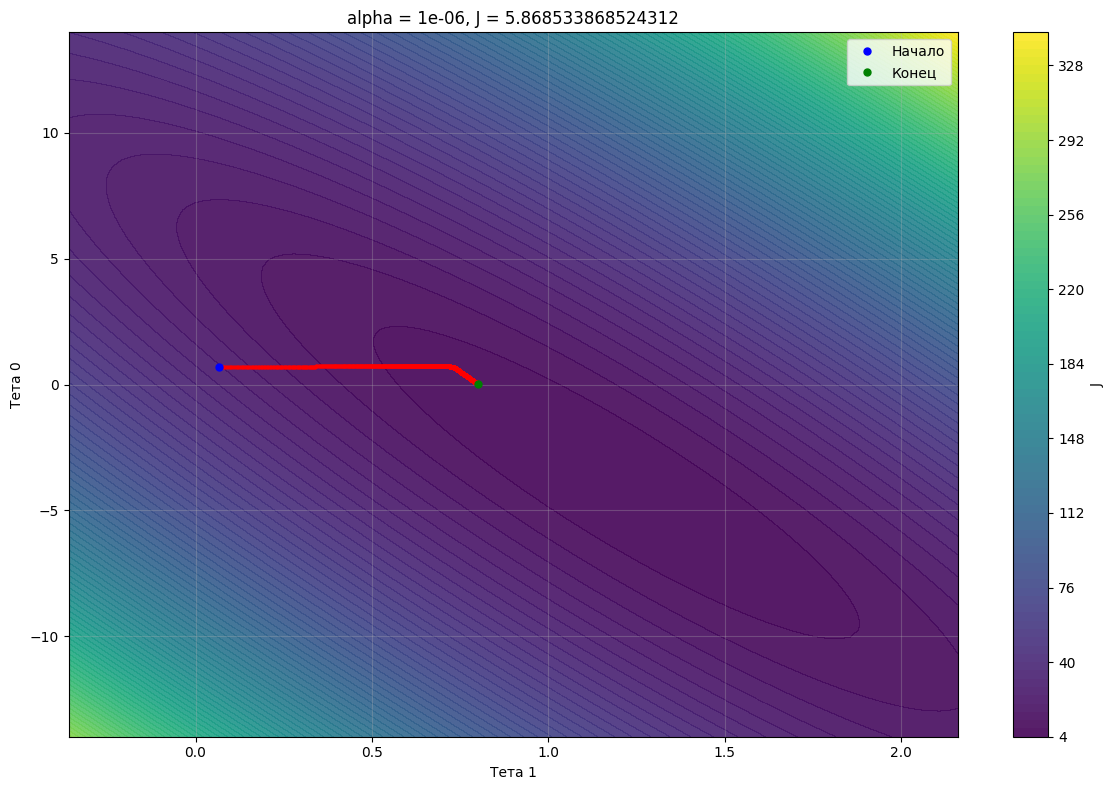

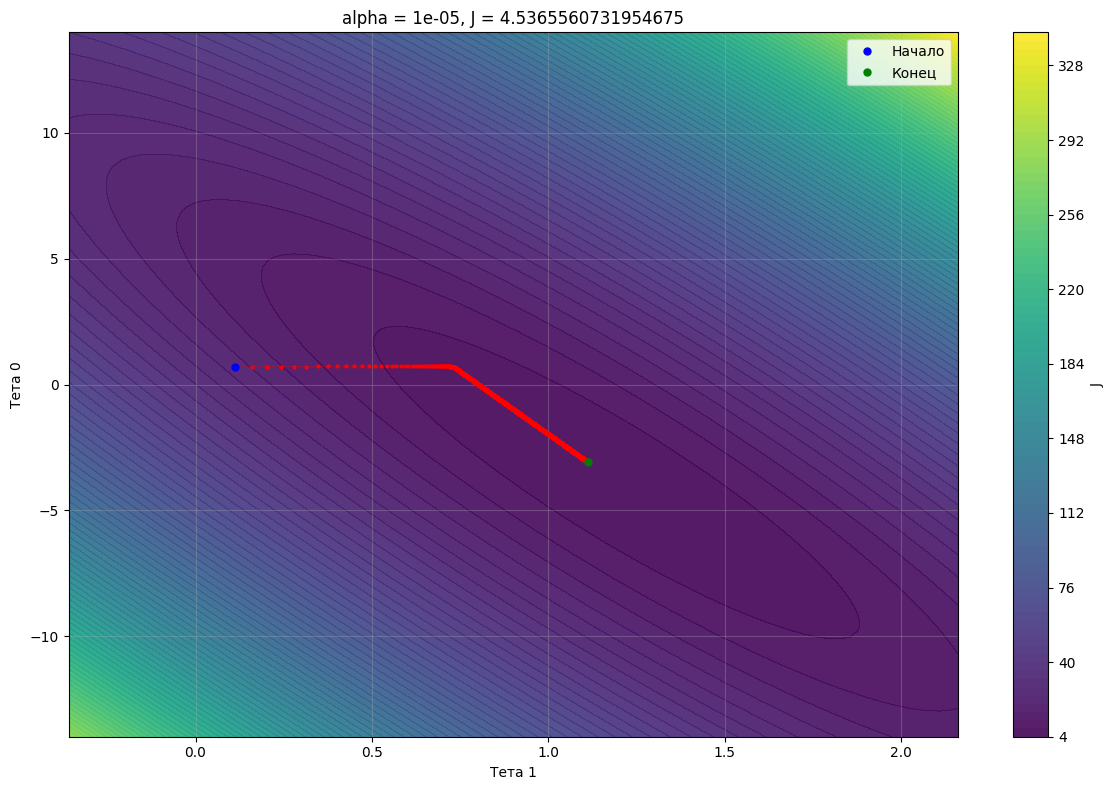

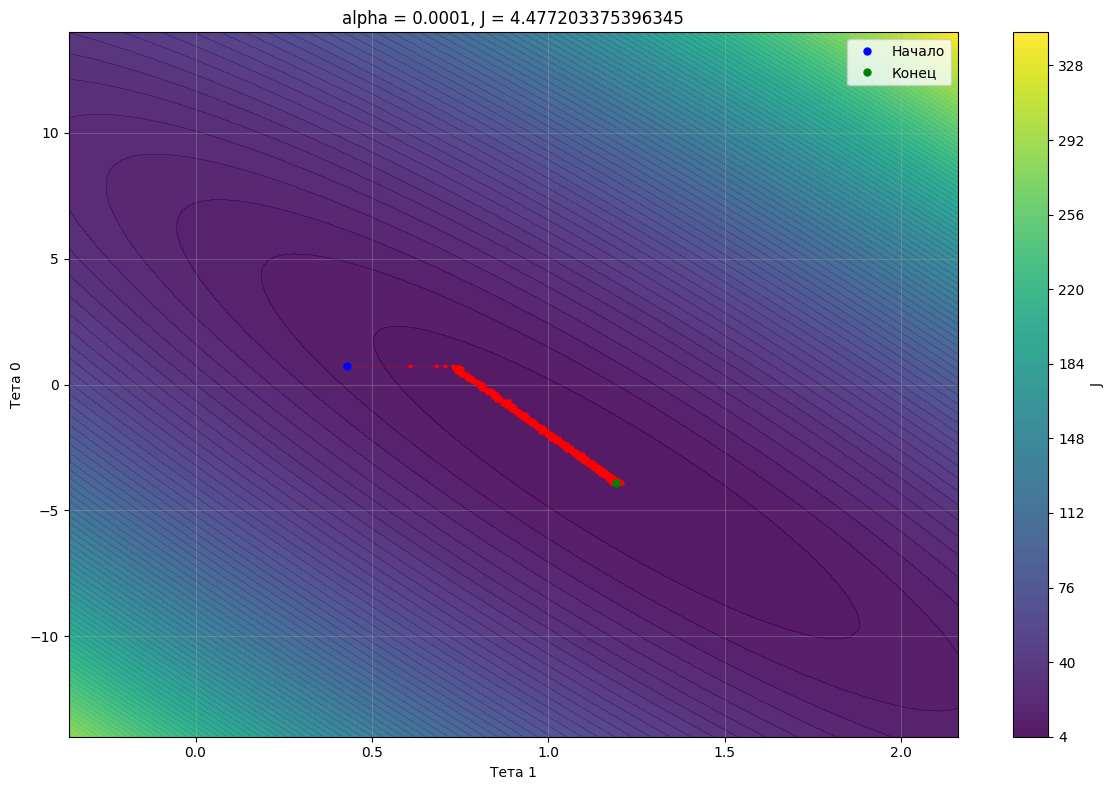

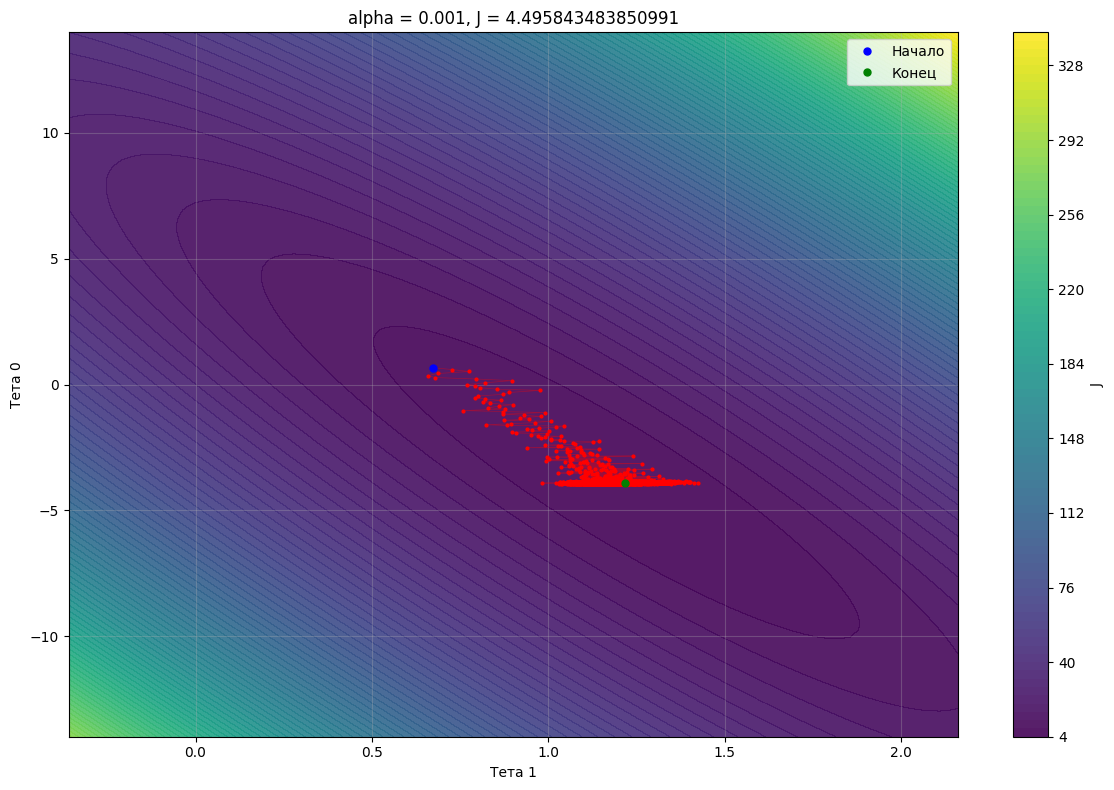

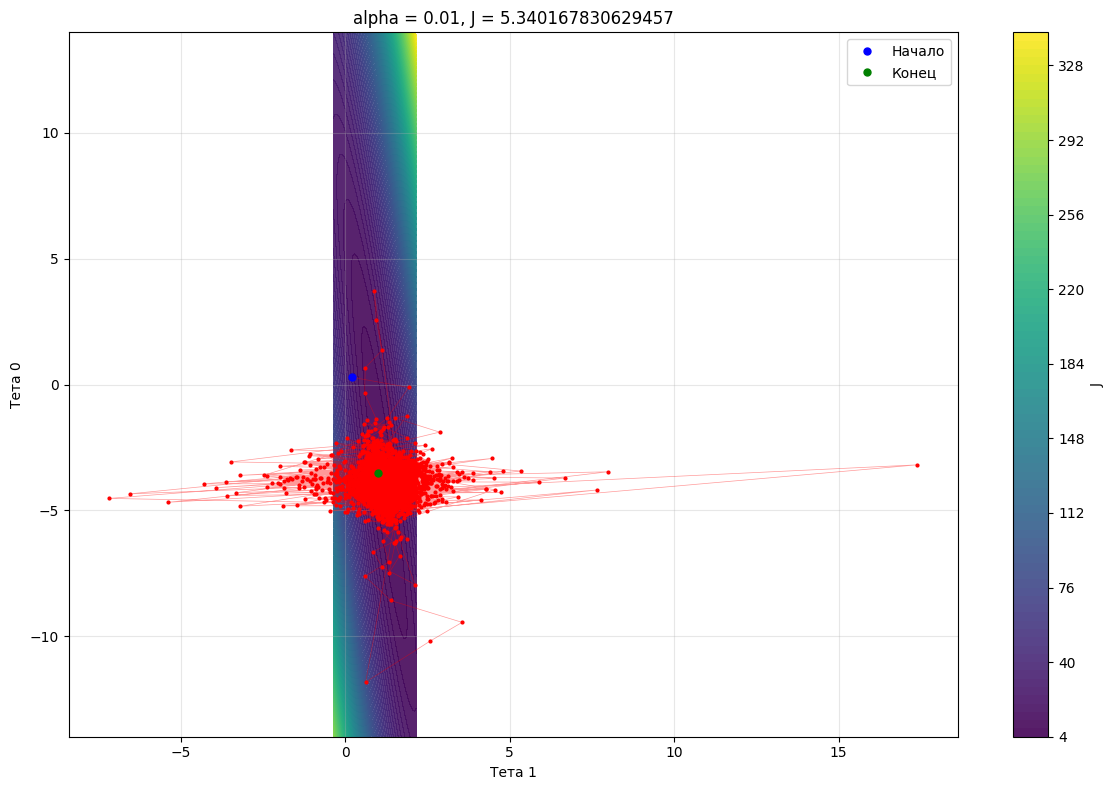

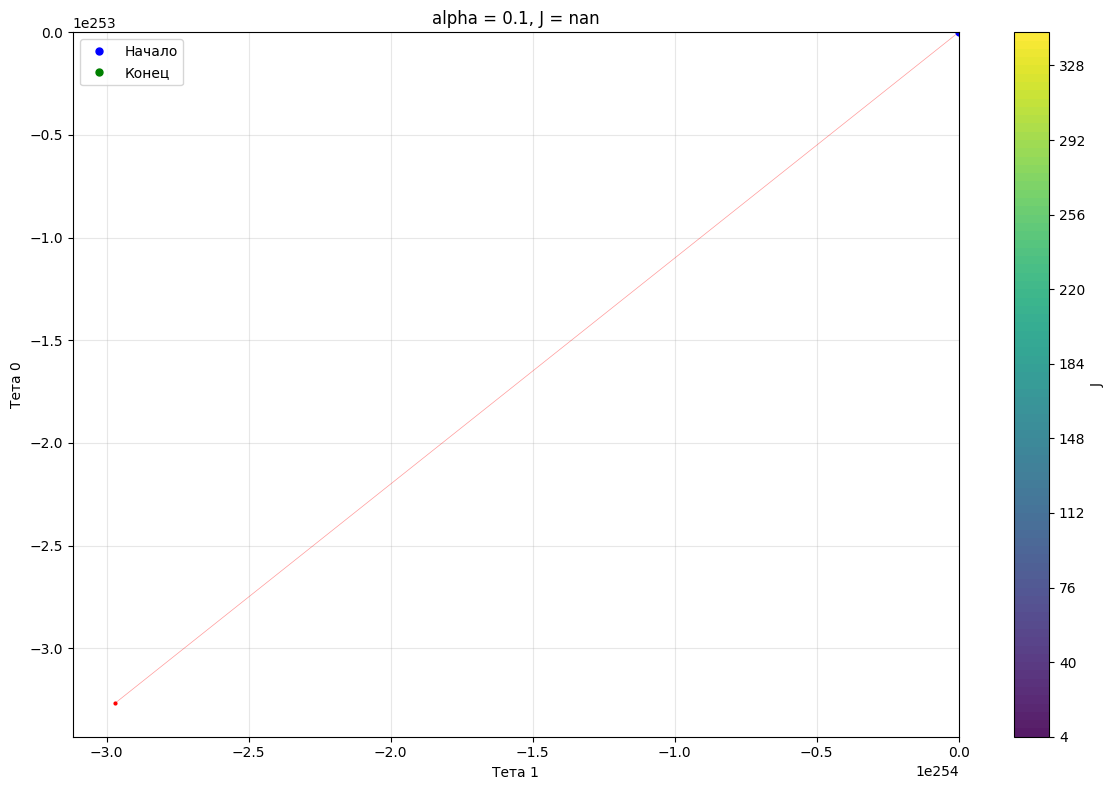

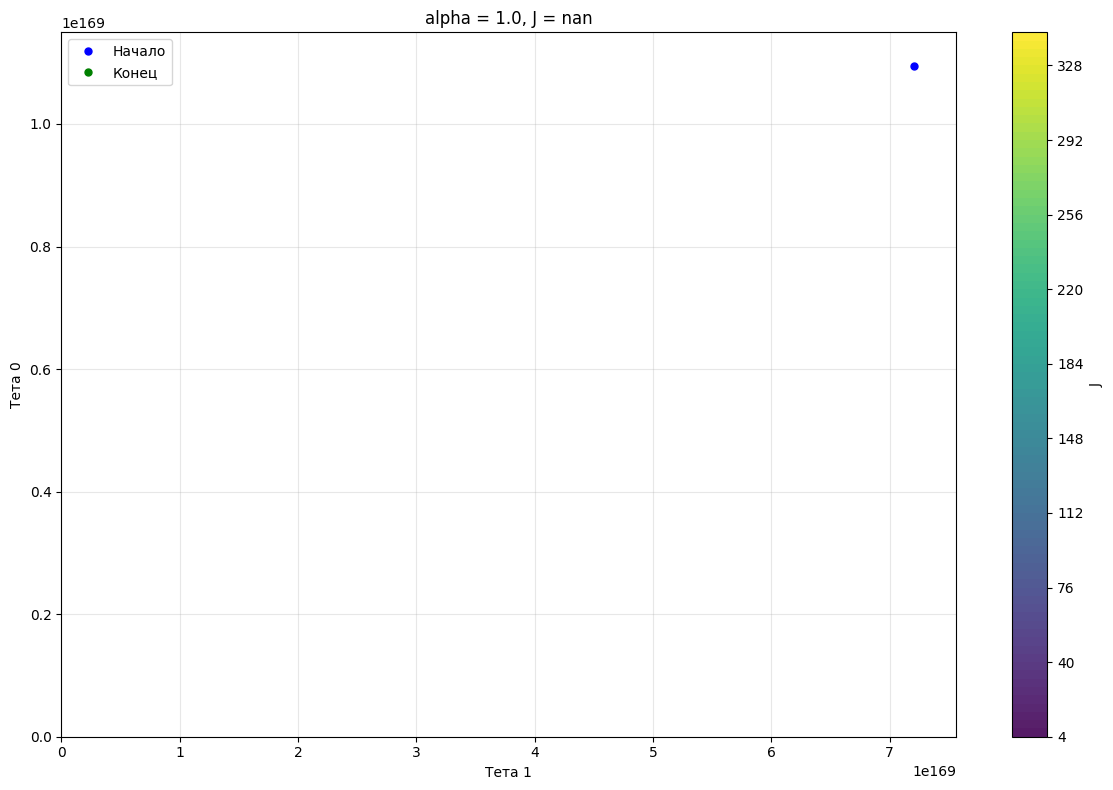

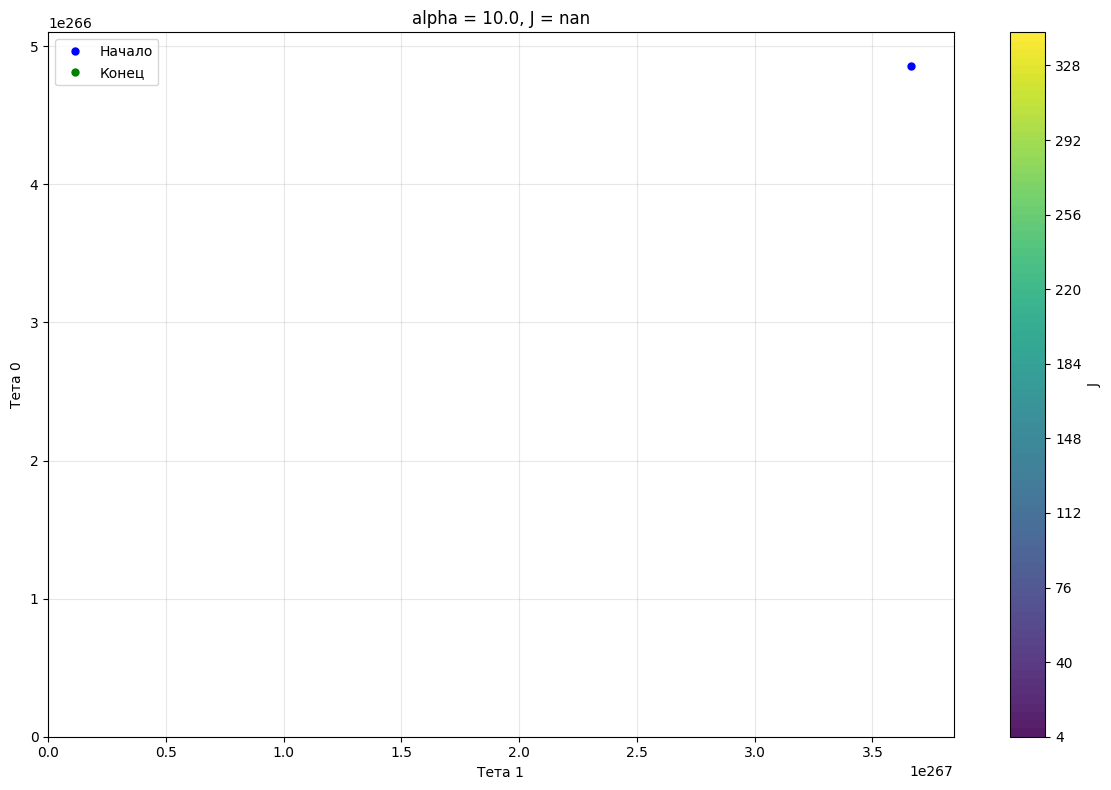

In [39]:
for alpha in alphas:
    visualize_sgd_specific_view(
        data_frame['x'].values,
        data_frame['y'].values,
        history[alpha]["theta_0_list"],
        history[alpha]["theta_1_list"],
        history[alpha]["Js"],
        alpha
    )